## Import needed libraries

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk import word_tokenize, Text
import re
import string
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

## Transfer Timestamp into datetime

In [2]:
df = pd.read_csv('../data/clean_data/clean_data_annotated.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'],format='"%Y-%m-%d %H:%M"')#"2020-07-31 11:45"
df.head(5)

UserName            Handle           Timestamp  \
0  Michael Lewis & Friends  @Michael65413248 2020-07-31 11:45:00   
1          harish on wafto     @harishpillay 2020-07-30 07:37:00   
2            Angry Merlion       @jj09102010 2020-07-25 04:25:00   
3           SUTD Singapore           @sutdsg 2020-07-22 08:30:00   
4              Karen M. Fu         @karen_fu 2020-07-20 08:49:00   

                                             Content  Likes Retweets Emojis  \
0  Bloggers commented on #COVID19SG #COVID19Singa...   79.0     41.0      0   
1  They feel that they can just keep the narrativ...    0.0      1.0      0   
2  The legend of #singapore opposition movement. ...    0.0      0.0      0   
3  Regardless of race, language, or religion - th...    0.0      1.0      0   
4  Senior Minister Tharman Shanmugaratnam comment...    0.0      0.0      0   

   Comments       Tag  sentiment_scores  Textblob_sentiment_scores  \
0       0.0  GE2020SG          0.318450              -1.850372e-17   
1       0.0  GE2020SG         -0.477729              -1.428571e-01   
2       0.0  GE2020SG          0.000000               0.000000e+00   
3       0.0  GE2020SG         -0.116667              -2.333333e-01   
4       0.0  GE2020SG          0.290900               2.000000e-01   

   Vader_sentiment_scores Sentiment Textblob_sentiment Vader_sentiment  
0                  0.6369       pos                neg             pos  
1                 -0.8126       neg                neg             neg  
2                  0.0000   neutral            neutral         neutral  
3                  0.0000       neg                neg         neutral  
4                  0.3818       pos                pos             pos

## Tweets preprocessing

In [3]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt
df['Content'] = np.vectorize(remove_pattern)(df['Content'], "#[\w]*")#remove hashtag
df['Content'] = np.vectorize(remove_pattern)(df['Content'], "@[\w]*")#remove @
df

UserName            Handle           Timestamp  \
0     Michael Lewis & Friends  @Michael65413248 2020-07-31 11:45:00   
1             harish on wafto     @harishpillay 2020-07-30 07:37:00   
2               Angry Merlion       @jj09102010 2020-07-25 04:25:00   
3              SUTD Singapore           @sutdsg 2020-07-22 08:30:00   
4                 Karen M. Fu         @karen_fu 2020-07-20 08:49:00   
...                       ...               ...                 ...   
8765              thisandthat    @38thisandthat 2020-07-10 01:07:00   
8766       The Business Times    @BusinessTimes 2020-07-10 00:43:00   
8767           Cherian George    @cheriangeorge 2020-07-10 00:15:00   
8768                   ‡Æ∞‡Ææ‡Æú‡Øá‡Æ∑‡Øç    @RajeshChakram 2020-07-10 00:03:00   
8769              Asia Elects       @AsiaElects 2020-07-10 00:00:00   

                                                Content  Likes Retweets  \
0     Bloggers commented on   &    went missing befo...   79.0     41.0   
1     They feel that they can just keep the narrativ...    0.0      1.0   
2                 The legend of  opposition movement.      0.0      0.0   
3     Regardless of race, language, or religion - th...    0.0      1.0   
4     Senior Minister Tharman Shanmugaratnam comment...    0.0      0.0   
...                                                 ...    ...      ...   
8765   : What to do on Polling DaySingapore GE2020: ...    0.0      0.0   
8766  : \n\n urges voters to imagine a  that is 'far...    1.0      3.0   
8767  Understated auto-response to http://Academia.S...   10.0     83.0   
8768     Good luck  \nGood luck \n\n\nVotes\n\nElection    1.0      0.0   
8769  Singapore:\n\nLegislative Election today,\n\n‚û§...   12.0     20.0   

     Emojis  Comments       Tag  sentiment_scores  Textblob_sentiment_scores  \
0         0       0.0  GE2020SG          0.318450              -1.850372e-17   
1         0       0.0  GE2020SG         -0.477729              -1.428571e-01   
2         0       0.0  GE2020SG          0.000000               0.000000e+00   
3         0       0.0  GE2020SG         -0.116667              -2.333333e-01   
4         0       0.0  GE2020SG          0.290900               2.000000e-01   
...     ...       ...       ...               ...                        ...   
8765      0       0.0    Ge2020          0.329850               0.000000e+00   
8766      0       0.0    Ge2020          0.050000               1.000000e-01   
8767      0       1.0    Ge2020         -0.120033              -2.916667e-01   
8768      0       1.0    Ge2020          0.359200               0.000000e+00   
8769      0       0.0    Ge2020          0.238600               4.000000e-01   

      Vader_sentiment_scores Sentiment Textblob_sentiment Vader_sentiment  
0                     0.6369       pos                neg             pos  
1                    -0.8126       neg                neg             neg  
2                     0.0000   neutral            neutral         neutral  
3                     0.0000       neg                neg         neutral  
4                     0.3818       pos                pos             pos  
...                      ...       ...                ...             ...  
8765                  0.6597       pos            neutral             pos  
8766                  0.0000       pos                pos         neutral  
8767                  0.0516       neg                neg             pos  
8768                  0.7184       pos            neutral             pos  
8769                  0.0772       pos                pos             pos  

[8770 rows x 15 columns]

In [4]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
def preprocess(text):
    # Clean the text

    text = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?¬´¬ª‚Äú‚Äù‚Äò‚Äô]))''', " ", text)
    text = re.sub(r'''(?i)\b((?:http?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?¬´¬ª‚Äú‚Äù‚Äò‚Äô]))''', " ", text)
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"[^a-zA-Z#]"," ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #remove punctuation
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)  
    filtered_words = [w.lower() for w in tokens if not w.lower() in stopwords.words('english')] 
#     stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(lemma_words)

In [5]:
df['Content'] = df['Content'].apply(preprocess)
df.head(5)

UserName            Handle           Timestamp  \
0  Michael Lewis & Friends  @Michael65413248 2020-07-31 11:45:00   
1          harish on wafto     @harishpillay 2020-07-30 07:37:00   
2            Angry Merlion       @jj09102010 2020-07-25 04:25:00   
3           SUTD Singapore           @sutdsg 2020-07-22 08:30:00   
4              Karen M. Fu         @karen_fu 2020-07-20 08:49:00   

                                             Content  Likes Retweets Emojis  \
0  blogger commented went missing july an activel...   79.0     41.0      0   
1  feel keep narrative deny everything else showe...    0.0      1.0      0   
2                         legend opposition movement    0.0      0.0      0   
3  regardless race language religion topic race l...    0.0      1.0      0   
4  senior minister tharman shanmugaratnam comment...    0.0      0.0      0   

   Comments       Tag  sentiment_scores  Textblob_sentiment_scores  \
0       0.0  GE2020SG          0.318450              -1.850372e-17   
1       0.0  GE2020SG         -0.477729              -1.428571e-01   
2       0.0  GE2020SG          0.000000               0.000000e+00   
3       0.0  GE2020SG         -0.116667              -2.333333e-01   
4       0.0  GE2020SG          0.290900               2.000000e-01   

   Vader_sentiment_scores Sentiment Textblob_sentiment Vader_sentiment  
0                  0.6369       pos                neg             pos  
1                 -0.8126       neg                neg             neg  
2                  0.0000   neutral            neutral         neutral  
3                  0.0000       neg                neg         neutral  
4                  0.3818       pos                pos             pos

In [6]:
df['Content'] = df['Content'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2 or w=='wp' or w=='rp']))
df.head()

UserName            Handle           Timestamp  \
0  Michael Lewis & Friends  @Michael65413248 2020-07-31 11:45:00   
1          harish on wafto     @harishpillay 2020-07-30 07:37:00   
2            Angry Merlion       @jj09102010 2020-07-25 04:25:00   
3           SUTD Singapore           @sutdsg 2020-07-22 08:30:00   
4              Karen M. Fu         @karen_fu 2020-07-20 08:49:00   

                                             Content  Likes Retweets Emojis  \
0  blogger commented went missing july actively s...   79.0     41.0      0   
1  feel keep narrative deny everything else showe...    0.0      1.0      0   
2                         legend opposition movement    0.0      0.0      0   
3  regardless race language religion topic race l...    0.0      1.0      0   
4  senior minister tharman shanmugaratnam comment...    0.0      0.0      0   

   Comments       Tag  sentiment_scores  Textblob_sentiment_scores  \
0       0.0  GE2020SG          0.318450              -1.850372e-17   
1       0.0  GE2020SG         -0.477729              -1.428571e-01   
2       0.0  GE2020SG          0.000000               0.000000e+00   
3       0.0  GE2020SG         -0.116667              -2.333333e-01   
4       0.0  GE2020SG          0.290900               2.000000e-01   

   Vader_sentiment_scores Sentiment Textblob_sentiment Vader_sentiment  
0                  0.6369       pos                neg             pos  
1                 -0.8126       neg                neg             neg  
2                  0.0000   neutral            neutral         neutral  
3                  0.0000       neg                neg         neutral  
4                  0.3818       pos                pos             pos

## A brief analysis of extracted tweets

In [7]:
df['Timestamp'].value_counts()

2020-05-08 20:30:00    36
2020-07-11 03:38:00    17
2020-05-07 07:20:00    14
2020-05-08 20:08:00    13
2020-07-11 02:40:00    12
                       ..
2020-05-24 09:24:00     1
2020-05-08 03:02:00     1
2020-07-08 09:48:00     1
2020-07-10 01:01:00     1
2020-06-23 04:07:00     1
Name: Timestamp, Length: 5412, dtype: int64

In [8]:
df.groupby([df['Timestamp'].dt.month]).agg({'count'})

UserName Handle Timestamp Content Likes Retweets Emojis Comments  \
             count  count     count   count count    count  count    count   
Timestamp                                                                    
5             1176   1181      1181    1181  1181     1181   1181     1181   
6             1437   1439      1439    1439  1439     1439   1439     1439   
7             6140   6150      6150    6150  6150     6150   6150     6150   

            Tag sentiment_scores Textblob_sentiment_scores  \
          count            count                     count   
Timestamp                                                    
5          1181             1181                      1181   
6          1439             1439                      1439   
7          6150             6150                      6150   

          Vader_sentiment_scores Sentiment Textblob_sentiment Vader_sentiment  
                           count     count              count           count  
Timestamp                                                                      
5                           1181      1181               1181            1181  
6                           1439      1439               1439            1439  
7                           6150      6150               6150            6150

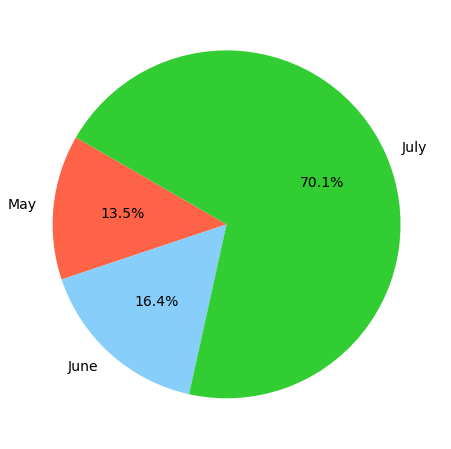

In [9]:
# Tweet number by month
month = ['May','June','July']
sizes = [1181,1439,6150]

fig = plt.figure(figsize=(16,8))
colors = ['tomato','lightskyblue','limegreen']
plt.pie(sizes,labels=month,colors=colors,autopct='%1.1f%%',shadow=False,startangle=150,textprops={'fontsize':14})
plt.show()

fig.savefig('../img/tweet_number_by_month.png', dpi=600, bbox_inches='tight', transparent=True)

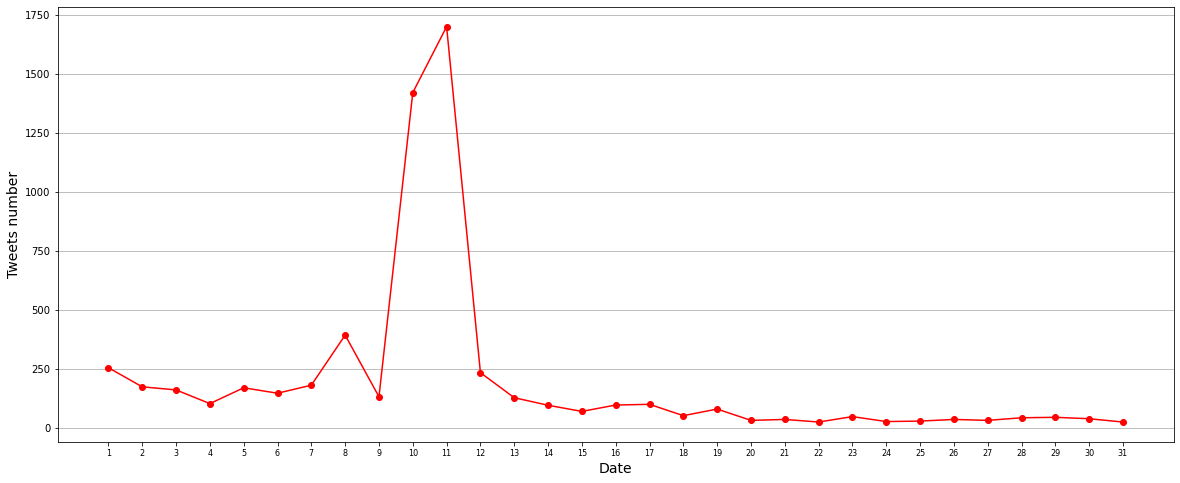

In [10]:
#Tweets in July
df1 = df[df['Timestamp'].dt.month==7]
b = df1.groupby([df['Timestamp'].dt.day]).agg({'count'})
count = b.iloc[:,0]
day = []
for i in range(1,32):
    day.append(str(i))

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(day, count, color='#ff0000', marker='o')
ax.set_xticklabels(day, fontsize=8)
ax.set_ylabel('Tweets number', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
plt.gca().yaxis.grid(True)
plt.show()

fig.savefig('../img/Tweets_by_date.png', bbox_inches='tight', dpi=600, transparent=True)

## Analysis of all tweets

In [11]:
# merge the tweets content into a text
text = []
for row in df.itertuples():
    i = getattr(row, 'Content')
    text.append(i)
text = ' '.join(text)
wordlists = word_tokenize(text)
text = nltk.Text(wordlists)
type(text)

nltk.text.Text

In [12]:
### shows the frequency of each item in the text
fdist = nltk.FreqDist(text)
fdist.most_common(10)

[('election', 5173),
 ('singapore', 4999),
 ('general', 3949),
 ('party', 1753),
 ('pap', 1478),
 ('vote', 1362),
 ('com', 892),
 ('result', 826),
 ('opposition', 698),
 ('day', 675)]

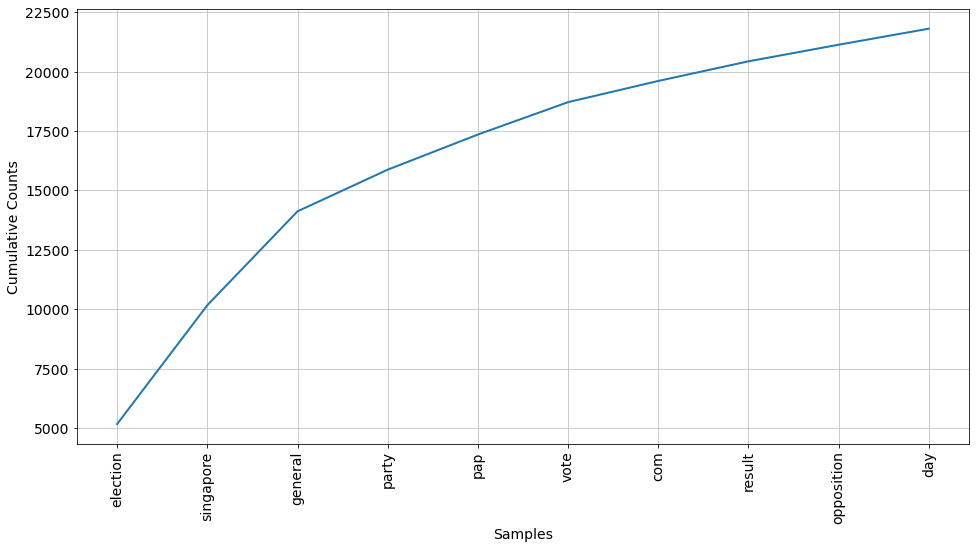

In [13]:
# generate a cumulative frequency plot to determine proportion of the text taken up by the words
%matplotlib inline
fig = plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size': 14})
fdist.plot(10, cumulative=True)
fig.savefig("../img/fdist.png",dpi=600, bbox_inches='tight')

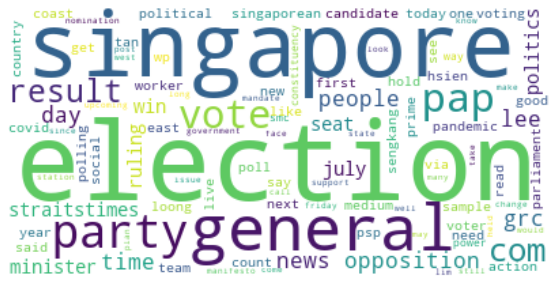

In [14]:
# generate a wordcloud
dictionary=Counter(text)
cloud = WordCloud(max_font_size=80,background_color='white', max_words=100).generate_from_frequencies(dictionary)
fig = plt.figure(figsize=(10,5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
fig.savefig("../img/wordcloud.png",dpi=600, bbox_inches='tight')

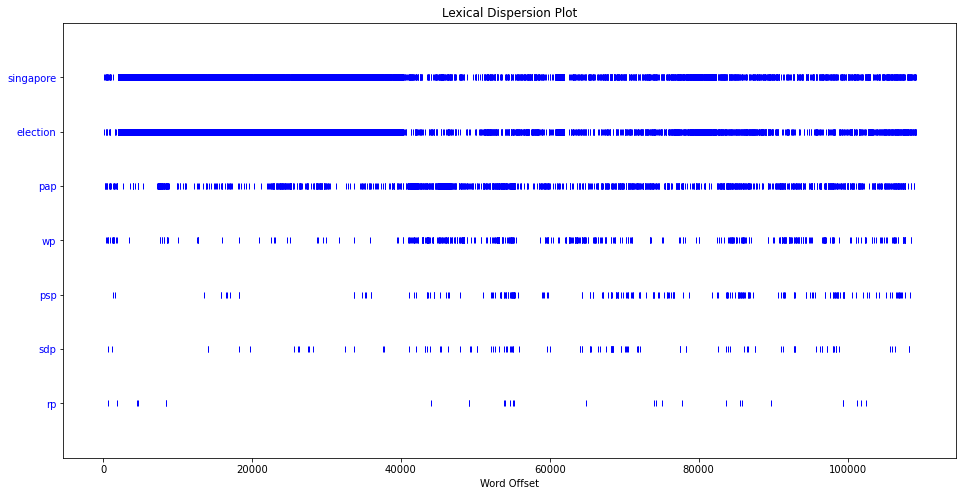

In [15]:
%matplotlib inline
fig = plt.figure(figsize=(16,8))
text.dispersion_plot(["singapore", "election", "pap", "wp", "psp", "sdp", "rp"])
fig.savefig('../img/dispersion_plot.png', transparent=True, bbox_inches='tight')

In [16]:
# bigrams of tweets
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)
dist = cfd['pap']
dist.most_common(10)

[('win', 112),
 ('candidate', 54),
 ('psp', 42),
 ('wp', 34),
 ('team', 32),
 ('supporter', 28),
 ('conservative', 27),
 ('singapore', 25),
 ('seat', 22),
 ('party', 19)]

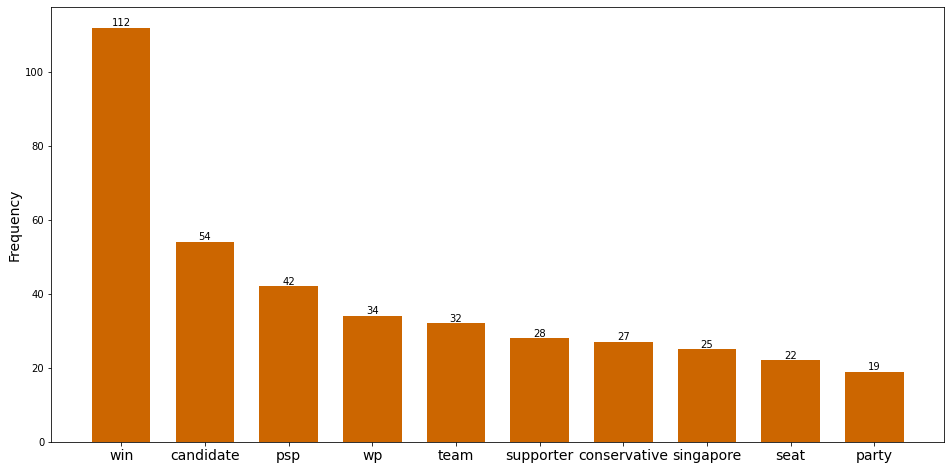

In [17]:
words = ['win', 'candidate', 'psp', 'wp', 'team', 'supporter', 'conservative', 'singapore', 'seat', 'party']
data = [112,54,42,34,32,28,27,25,22,19]

ind = np.arange(len(words))
width = 0.7   
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot()
yvals = data
rects1 = ax.bar(ind, yvals, width, color='#cc6600')
ax.set_ylabel('Frequency', fontsize=14)
ax.set_xticks(ind)
ax.set_xticklabels(words, fontsize=14)

def autolabel(rects): #put number above bar 
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2, 1*h, h,
                ha='center', va='bottom')
autolabel(rects1) 
plt.show()
fig.savefig('../img/pap_bigram.png', transparent=True, bbox_inches='tight')

In [18]:
# bigrams of tweets
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)
dist = cfd['wp']
dist.most_common(10)

[('pap', 24),
 ('win', 23),
 ('chief', 23),
 ('centre', 22),
 ('east', 17),
 ('wp', 16),
 ('sengkang', 15),
 ('candidate', 9),
 ('psp', 8),
 ('sdp', 8)]

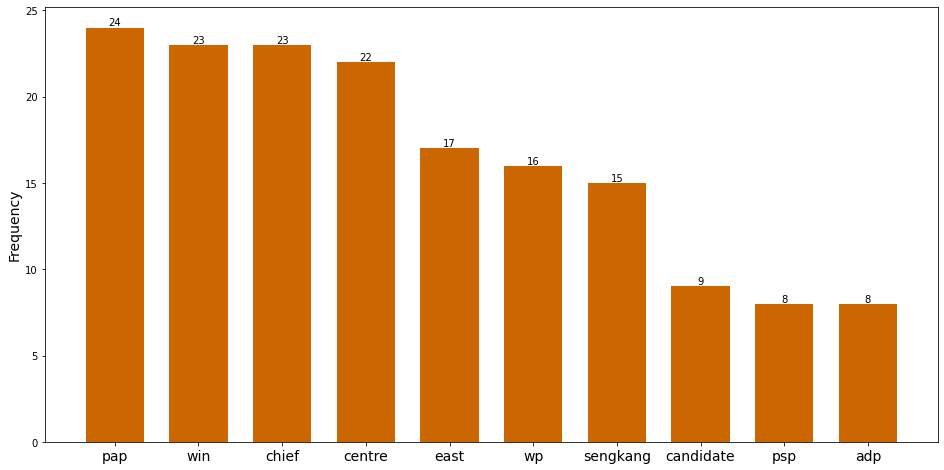

In [19]:
words = ['pap', 'win', 'chief', 'centre', 'east', 'wp', 'sengkang', 'candidate', 'psp', 'adp']
data = [24,23,23,22,17,16,15,9,8,8]

ind = np.arange(len(words))
width = 0.7   
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot()
yvals = data
rects1 = ax.bar(ind, yvals, width, color='#cc6600')
ax.set_ylabel('Frequency', fontsize=14)
ax.set_xticks(ind)
ax.set_xticklabels(words, fontsize=14)

def autolabel(rects): #put number above bar 
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2, 1*h, h,
                ha='center', va='bottom')
autolabel(rects1) 
plt.show()
fig.savefig('../img/wp_bigram.png', transparent=True, bbox_inches='tight')

## Wordcloud of positive tweets

In [20]:
df1 = df[df['Sentiment']=='pos']
df1

UserName            Handle           Timestamp  \
0     Michael Lewis & Friends  @Michael65413248 2020-07-31 11:45:00   
4                 Karen M. Fu         @karen_fu 2020-07-20 08:49:00   
9                    Credendo       @CredendoEN 2020-07-16 10:10:00   
10                Karen M. Fu         @karen_fu 2020-07-16 01:09:00   
15               bakkwabeelee           @muipo1 2020-07-12 08:02:00   
...                       ...               ...                 ...   
8764       The Political Geek     @politic_geek 2020-07-10 01:08:00   
8765              thisandthat    @38thisandthat 2020-07-10 01:07:00   
8766       The Business Times    @BusinessTimes 2020-07-10 00:43:00   
8768                   ‡Æ∞‡Ææ‡Æú‡Øá‡Æ∑‡Øç    @RajeshChakram 2020-07-10 00:03:00   
8769              Asia Elects       @AsiaElects 2020-07-10 00:00:00   

                                                Content  Likes Retweets  \
0     blogger commented went missing july actively s...   79.0     41.0   
4     senior minister tharman shanmugaratnam comment...    0.0      0.0   
9     strong economic fundamental ample government s...    0.0      1.0   
10    better understand millennials win back say amb...    0.0      0.0   
15       remember pmd dialogue ballot box powerful tool    0.0      2.0   
...                                                 ...    ...      ...   
8764  voting begun see people streaming polling stat...   25.0    122.0   
8765  polling daysingapore polling day politics news...    0.0      0.0   
8766                      urge voter imagine far better    1.0      3.0   
8768                  good luck good luck vote election    1.0      0.0   
8769  singapore legislative election today poll open...   12.0     20.0   

     Emojis  Comments       Tag  sentiment_scores  Textblob_sentiment_scores  \
0         0       0.0  GE2020SG          0.318450              -1.850372e-17   
4         0       0.0  GE2020SG          0.290900               2.000000e-01   
9         0       0.0  GE2020SG          0.402239               2.777778e-01   
10        0       0.0  GE2020SG          0.107143               2.142857e-01   
15        0       0.0  GE2020SG          0.360750               3.000000e-01   
...     ...       ...       ...               ...                        ...   
8764      0       3.0    Ge2020          0.502617               4.333333e-01   
8765      0       0.0    Ge2020          0.329850               0.000000e+00   
8766      0       0.0    Ge2020          0.050000               1.000000e-01   
8768      0       1.0    Ge2020          0.359200               0.000000e+00   
8769      0       0.0    Ge2020          0.238600               4.000000e-01   

      Vader_sentiment_scores Sentiment Textblob_sentiment Vader_sentiment  
0                     0.6369       pos                neg             pos  
4                     0.3818       pos                pos             pos  
9                     0.5267       pos                pos             pos  
10                    0.0000       pos                pos         neutral  
15                    0.4215       pos                pos             pos  
...                      ...       ...                ...             ...  
8764                  0.5719       pos                pos             pos  
8765                  0.6597       pos            neutral             pos  
8766                  0.0000       pos                pos         neutral  
8768                  0.7184       pos            neutral             pos  
8769                  0.0772       pos                pos             pos  

[3212 rows x 15 columns]

In [21]:
# merge the tweets content into a text
text = []
for row in df1.itertuples():
    i = getattr(row, 'Content')
    text.append(i)
text = ' '.join(text)
wordlists = word_tokenize(text)
text = nltk.Text(wordlists)
type(text)

nltk.text.Text

In [22]:
### shows the frequency of each item in the text
fdist = nltk.FreqDist(text)
fdist.most_common(10)

[('singapore', 1969),
 ('election', 1939),
 ('general', 1452),
 ('party', 845),
 ('vote', 650),
 ('pap', 539),
 ('com', 414),
 ('opposition', 364),
 ('result', 363),
 ('people', 326)]

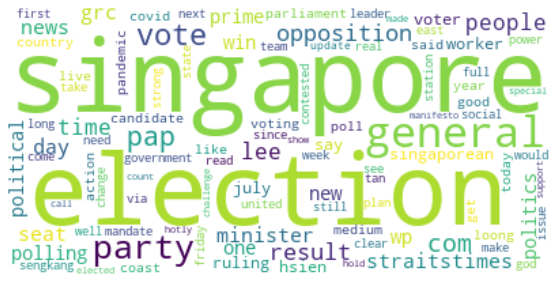

In [23]:
# generate a wordcloud
dictionary=Counter(text)
cloud = WordCloud(max_font_size=80,background_color='white', max_words=100).generate_from_frequencies(dictionary)
fig = plt.figure(figsize=(10,5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
fig.savefig("../img/wordcloud_pos.png",dpi=600, bbox_inches='tight')

## Wordcloud of negative tweets

In [24]:
df2 = df[df['Sentiment']=='neg']
df2

UserName           Handle           Timestamp  \
1       harish on wafto    @harishpillay 2020-07-30 07:37:00   
3        SUTD Singapore          @sutdsg 2020-07-22 08:30:00   
6           Karen M. Fu        @karen_fu 2020-07-19 11:32:00   
11              mrbrown         @mrbrown 2020-07-15 09:09:00   
14    the political cat        @theMmcat 2020-07-12 10:22:00   
...                 ...              ...                 ...   
8735        Richard Lim          @rltl17 2020-07-10 08:20:00   
8753             ANFREL          @Anfrel 2020-07-10 04:01:00   
8758             ANFREL          @Anfrel 2020-07-10 02:31:00   
8761     Saleena Saleem  @saleena_saleem 2020-07-10 02:07:00   
8767     Cherian George   @cheriangeorge 2020-07-10 00:15:00   

                                                Content  Likes Retweets  \
1     feel keep narrative deny everything else showe...    0.0      1.0   
3     regardless race language religion topic race l...    0.0      1.0   
6                             well knew risk best could    0.0      0.0   
11            kim huat score winner loser critical exam   15.0     96.0   
14    without doubt china biggest strategic challege...    0.0      0.0   
...                                                 ...    ...      ...   
8735  pandemic precaution lack rally aside like elec...    1.0      0.0   
8753  singaporean wearing mask glove cast ballot fri...    1.0      1.0   
8758  senior assigned voting time band morning polli...    1.0      1.0   
8761        may choice reflect hope fear nelson mandela    1.0      1.0   
8767  understated auto response newsletter subscribe...   10.0     83.0   

     Emojis  Comments       Tag  sentiment_scores  Textblob_sentiment_scores  \
1         0       0.0  GE2020SG         -0.477729                  -0.142857   
3         0       0.0  GE2020SG         -0.116667                  -0.233333   
6         0       0.0  GE2020SG         -0.136600                   0.000000   
11        0       0.0  GE2020SG         -0.113150                   0.000000   
14        0       0.0  GE2020SG         -0.180600                   0.000000   
...     ...       ...       ...               ...                        ...   
8735      0       1.0    Ge2020         -0.354811                  -0.097222   
8753      0       0.0    Ge2020         -0.346150                  -0.150000   
8758      0       0.0    Ge2020         -0.250000                  -0.500000   
8761      0       0.0    Ge2020         -0.246950                   0.000000   
8767      0       1.0    Ge2020         -0.120033                  -0.291667   

      Vader_sentiment_scores Sentiment Textblob_sentiment Vader_sentiment  
1                    -0.8126       neg                neg             neg  
3                     0.0000       neg                neg         neutral  
6                    -0.2732       neg            neutral             neg  
11                   -0.2263       neg            neutral             neg  
14                   -0.3612       neg            neutral             neg  
...                      ...       ...                ...             ...  
8735                 -0.6124       neg                neg             neg  
8753                 -0.5423       neg                neg             neg  
8758                  0.0000       neg                neg         neutral  
8761                 -0.4939       neg            neutral             neg  
8767                  0.0516       neg                neg             pos  

[1690 rows x 15 columns]

In [25]:
# merge the tweets content into a text
text = []
for row in df2.itertuples():
    i = getattr(row, 'Content')
    text.append(i)
text = ' '.join(text)
wordlists = word_tokenize(text)
text = nltk.Text(wordlists)
type(text)

nltk.text.Text

In [26]:
### shows the frequency of each item in the text
fdist = nltk.FreqDist(text)
fdist.most_common(10)

[('election', 742),
 ('singapore', 725),
 ('pap', 452),
 ('general', 444),
 ('party', 346),
 ('com', 248),
 ('vote', 230),
 ('news', 191),
 ('opposition', 176),
 ('people', 164)]

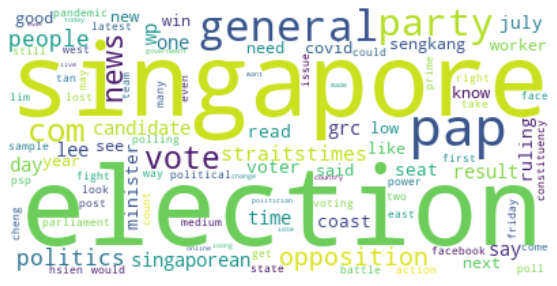

In [27]:
# generate a wordcloud
dictionary=Counter(text)
cloud = WordCloud(max_font_size=80,background_color='white', max_words=100).generate_from_frequencies(dictionary)
fig = plt.figure(figsize=(10,5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
fig.savefig("../img/wordcloud_neg.png",dpi=600, bbox_inches='tight')

## Wordcloud of neutral tweets

In [28]:
df3 = df[df['Sentiment']=='neutral']
df3

UserName            Handle           Timestamp  \
2           Angry Merlion       @jj09102010 2020-07-25 04:25:00   
5     Pantheon Percussion  @PantheonPercuss 2020-07-19 10:17:00   
7                   xxx65         @WahLau13 2020-07-19 09:52:00   
8               Aj Morris         @ajishhhh 2020-07-17 07:34:00   
12                     KY  @republicocities 2020-07-15 02:56:00   
...                   ...               ...                 ...   
8739              hongrui       @hongruilee 2020-07-10 06:27:00   
8748       Curtis S. Chin      @CurtisSChin 2020-07-10 04:35:00   
8757         Yuan Wenling      @yuanwenling 2020-07-10 02:41:00   
8759               ARUNAA        @Arunaa206 2020-07-10 02:27:00   
8760               ARUNAA        @Arunaa206 2020-07-10 02:20:00   

                                                Content  Likes Retweets  \
2                            legend opposition movement    0.0      0.0   
5     wokfunk make repost jamus korkor respond colla...    0.0      0.0   
7                                                 cecum    0.0      0.0   
8                          wonder kena first pofma post    0.0      0.0   
12                                          indeed dare    0.0      0.0   
...                                                 ...    ...      ...   
8739                                    voted singapore    0.0      1.0   
8748  five year ago mark election dyk singaporean po...    1.0      5.0   
8757                finished national service singapore    0.0      0.0   
8759  casting vote singapore poll singapore election...    0.0      1.0   
8760  casting vote singapore poll singapore election...    0.0      1.0   

     Emojis  Comments       Tag  sentiment_scores  Textblob_sentiment_scores  \
2         0       0.0  GE2020SG               0.0                        0.0   
5         0       0.0  GE2020SG               0.0                        0.0   
7         0       0.0  GE2020SG               0.0                        0.0   
8         0       0.0  GE2020SG               0.0                        0.0   
12        0       0.0  GE2020SG               0.0                        0.0   
...     ...       ...       ...               ...                        ...   
8739      0       0.0    Ge2020               0.0                        0.0   
8748      0       0.0    Ge2020               0.0                        0.0   
8757      0       1.0    Ge2020               0.0                        0.0   
8759    üñä üó≥       0.0    Ge2020               0.0                        0.0   
8760      0       0.0    Ge2020               0.0                        0.0   

      Vader_sentiment_scores Sentiment Textblob_sentiment Vader_sentiment  
2                        0.0   neutral            neutral         neutral  
5                        0.0   neutral            neutral         neutral  
7                        0.0   neutral            neutral         neutral  
8                        0.0   neutral            neutral         neutral  
12                       0.0   neutral            neutral         neutral  
...                      ...       ...                ...             ...  
8739                     0.0   neutral            neutral         neutral  
8748                     0.0   neutral            neutral         neutral  
8757                     0.0   neutral            neutral         neutral  
8759                     0.0   neutral            neutral         neutral  
8760                     0.0   neutral            neutral         neutral  

[3868 rows x 15 columns]

In [29]:
# merge the tweets content into a text
text = []
for row in df3.itertuples():
    i = getattr(row, 'Content')
    text.append(i)
text = ' '.join(text)
wordlists = word_tokenize(text)
text = nltk.Text(wordlists)
type(text)

nltk.text.Text

In [30]:
### shows the frequency of each item in the text
fdist = nltk.FreqDist(text)
fdist.most_common(10)

[('election', 2492),
 ('singapore', 2305),
 ('general', 2053),
 ('party', 562),
 ('pap', 487),
 ('vote', 482),
 ('result', 352),
 ('day', 313),
 ('win', 309),
 ('grc', 274)]

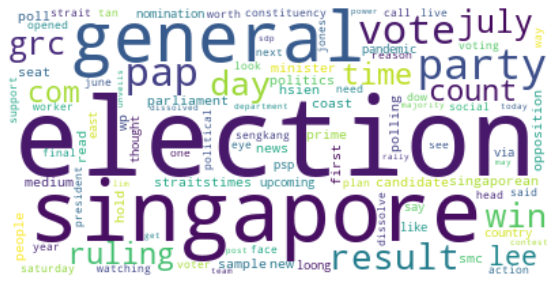

In [31]:
# generate a wordcloud
dictionary=Counter(text)
cloud = WordCloud(max_font_size=80,background_color='white', max_words=100).generate_from_frequencies(dictionary)
fig = plt.figure(figsize=(10,5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
fig.savefig("../img/wordcloud_neu.png",dpi=600, bbox_inches='tight')